In [1]:
import os
import multiprocessing
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
tests = [
  {'r': 10, 'k': 2, 'n': [2]},
  {'r': 10, 'k': 2, 'n': [2,4,8,16,32]}, 
  {'r':  5, 'k': 1, 'n': [2,4,8,16,32,64]},
  {'r':  3, 'k': 0, 'n': [2,4,8,16,32,64,128]}
]

src = 'log.txt'
client = './client.py'


In [40]:
# Definindo funções necessárias



def run_process(cmd_line):
    os.system(cmd_line)
    
def make_clients(N, r, k, test_number):
    # Gera processos do tipo cliente
    # Para que funcione corretamente, o servidor deve ser ativado em um terminal manualmente

    
    results = []
    
    for n in N:
        processes = []
        print(n)
        for i in range(n):
            print(i)

            cmd_line = f"python3 {client} {k} {r} {test_number} {n}"
            process = multiprocessing.Process(target=run_process, args=(cmd_line,))

            processes.append(process)
            process.start()

        for process in processes:
            process.join()
            
        elapsed_time = get_elapsed_time(test_number, n)
        
        results.append({
            'n': n,
            'elapsed_seconds': elapsed_time.seconds + elapsed_time.microseconds / 1000000
        })
        print(results)
        
    plot_results(results, test_number)
        
        

            
            
def get_elapsed_time(test_number, n):
    # Retorna o tempo corrido entre o início da escrita do arquivo e o fim
    f = open(f"resultado_{test_number}_{n}.txt", "r")
    lines = f.readlines()

    last_line = lines[-1].replace('\n', '').split(" ")
    endfile_datetime = dt.datetime.fromisoformat(f"{last_line[-2]} {last_line[-1]}")

    first_line = lines[0].replace('\n', '').split(" ")
    begin_datetime = dt.datetime.fromisoformat(f"{first_line[-2]} {first_line[-1]}")

    elapsed_time = endfile_datetime - begin_datetime

    return elapsed_time


def plot_results(results, test_number):
    
    arr_n = []
    arr_seconds = []
    
    for result in results: 
        arr_n.append(result['n'])
        arr_seconds.append(result['elapsed_seconds'])
        

    plt.plot(arr_n, arr_seconds,color='red', marker='o')
    plt.title(f'Resultados para o teste {test_number}', fontsize=14)
    plt.xlabel('Quantidade de processos', fontsize=14)
    plt.ylabel('Tempo (em segundos)', fontsize=14)
    plt.grid(True)
    plt.savefig(f'resultado_{test_number}.png')
    plt.show()




In [30]:
# Bloco comentado para que seja testado cada teste separadamente

"""
for test_number in range(len(tests)):
    test = tests[test_number]

    N = test['n']
    r = test['r']
    k = test['k']

    make_clients(N, r, k, test_number)
"""

2
0
1
['2', '10', '0', '2']
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
['2', '10', '0', '2']
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10


Traceback (most recent call last):
  File "./client.py", line 102, in <module>
    main()
  File "./client.py", line 67, in main
    time.sleep(k)
KeyboardInterrupt
Traceback (most recent call last):
  File "./client.py", line 102, in <module>
    main()
  File "./client.py", line 67, in main
    time.sleep(k)
KeyboardInterrupt


KeyboardInterrupt: 

2
0
1
['2', '10', '0', '2']
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Conexão encerrada
['2', '10', '0', '2']
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Conexão encerrada
[{'n': 2, 'elapsed_seconds': 576}]


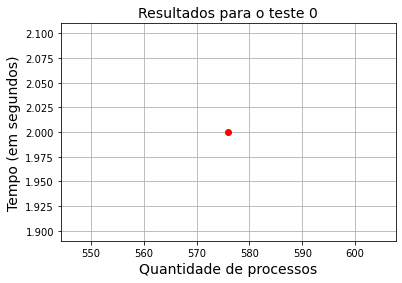

In [7]:
# Teste 0

test_number = 0
test = tests[test_number]

N = test['n']
r = test['r']
k = test['k']

make_clients(N, r, k, test_number)


2
0
1
['2', '10', '1', '2']
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Conexão encerrada
['2', '10', '1', '2']
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Conexão encerrada
[{'n': 2, 'elapsed_seconds': 18.041184}]
4
0
1
2
3
['2', '10', '1', '4']
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
A

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
['2', '10', '1', '32']
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Conexão encerrada
['2', '10', '1', '32']
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Conexão encerrada
['2', '10', '1', '32']
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Acesso concedido
Dormindo...10
Ac

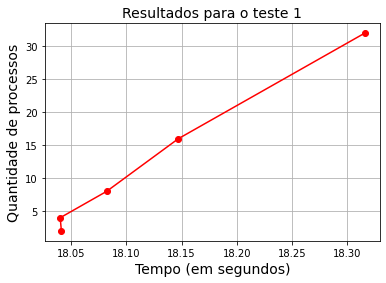

In [34]:
# Teste 1

test_number = 1
test = tests[test_number]

n = test['n']
r = test['r']
k = test['k']

make_clients(n, r, k, test_number)

2
0
1
['1', '5', '2', '2']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Conexão encerrada
['1', '5', '2', '2']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Conexão encerrada
[{'n': 2, 'elapsed_seconds': 4.012827}]
4
0
1
2
3
['1', '5', '2', '4']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Conexão encerrada
['1', '5', '2', '4']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Conexão encerrada
['1', '5', '2', '4']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Conexão encerrada
['1', '5', '2', '4']
Acesso concedido
Dormindo...5
Acesso conced

['1', '5', '2', '32']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Conexão encerrada
['1', '5', '2', '32']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Conexão encerrada
['1', '5', '2', '32']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Conexão encerrada
['1', '5', '2', '32']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Conexão encerrada
['1', '5', '2', '32']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Conexão encerrada
['1', '5', '2', '32']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Ace

['1', '5', '2', '64']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Conexão encerrada
['1', '5', '2', '64']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Conexão encerrada
['1', '5', '2', '64']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Conexão encerrada
['1', '5', '2', '64']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Conexão encerrada
['1', '5', '2', '64']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Conexão encerrada
['1', '5', '2', '64']
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Acesso concedido
Dormindo...5
Ace

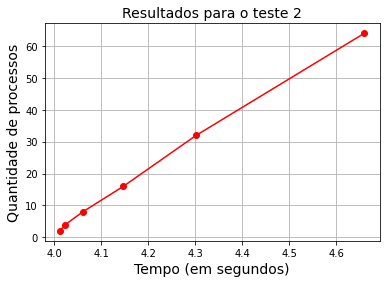

In [35]:
# Teste 2

test_number = 2
test = tests[test_number]

n = test['n']
r = test['r']
k = test['k']

make_clients(n, r, k, test_number)

In [36]:
# Teste 3

test_number = 3
test = tests[test_number]

n = test['n']
r = test['r']
k = test['k']

make_clients(n, r, k, test_number)

2
0
1
['0', '3', '3', '2']
Acesso concedido
Dormindo...3
Acesso concedido
Dormindo...3
Acesso concedido
Conexão encerrada
['0', '3', '3', '2']
Acesso concedido
Dormindo...3
Acesso concedido
Dormindo...3


Traceback (most recent call last):
  File "./client.py", line 102, in <module>
    main()
  File "./client.py", line 52, in main
    message = client.recv(F).decode('utf-8')
KeyboardInterrupt


KeyboardInterrupt: 